# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | nerang
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | yeppoon
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | jambi
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | paracuru
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | poitiers
Proces

Processing Record 36 of Set 4 | naze
Processing Record 37 of Set 4 | bengkulu
Processing Record 38 of Set 4 | poya
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | port augusta
Processing Record 41 of Set 4 | dakar
Processing Record 42 of Set 4 | mayumba
Processing Record 43 of Set 4 | auki
Processing Record 44 of Set 4 | banamba
Processing Record 45 of Set 4 | paita
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | ryki
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | zhelyabovka
Processing Record 0 of Set 5 | berlevag
Processing Record 1 of Set 5 | sheridan
Processing Record 2 of Set 5 | ambunti
Processing Record 3 of Set 5 | sao gabriel
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | cairns
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | sayyan
Processing Record 9 of Set 5 | dunedin

Processing Record 32 of Set 8 | belmonte
Processing Record 33 of Set 8 | umm lajj
Processing Record 34 of Set 8 | dzilam gonzalez
Processing Record 35 of Set 8 | chapais
Processing Record 36 of Set 8 | yerbogachen
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | bolshoy lug
Processing Record 39 of Set 8 | gerardmer
Processing Record 40 of Set 8 | samarai
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | disna
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | ulaanbaatar
Processing Record 45 of Set 8 | goundam
Processing Record 46 of Set 8 | crab hill
City not found. Skipping...
Processing Record 47 of Set 8 | lake city
Processing Record 48 of Set 8 | rosarito
Processing Record 49 of Set 8 | ca mau
Processing Record 0 of Set 9 | anklesvar
City not found. Skipping...
Processing Record 1 of Set 9 | manaure
Processing Record 2 of Set 9 | dangtu
Processing Record 3 of Set 9 | luis correia
Processing Record 4 of Set 9 | b

Processing Record 17 of Set 12 | peniche
Processing Record 18 of Set 12 | klyuchi
Processing Record 19 of Set 12 | vallenar
Processing Record 20 of Set 12 | kahului
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | phan rang
City not found. Skipping...
Processing Record 23 of Set 12 | surt
Processing Record 24 of Set 12 | yermish
Processing Record 25 of Set 12 | la rioja
Processing Record 26 of Set 12 | iralaya
Processing Record 27 of Set 12 | san cristobal
Processing Record 28 of Set 12 | iisalmi
Processing Record 29 of Set 12 | kaeo
Processing Record 30 of Set 12 | ugoofaaru
Processing Record 31 of Set 12 | rostovka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.48,76,8,12.71,PF,1675563787
1,hobart,-42.8794,147.3294,76.05,45,20,6.91,AU,1675563619
2,ushuaia,-54.8000,-68.3000,51.46,76,40,6.91,AR,1675563750
3,arraial do cabo,-22.9661,-42.0278,76.33,91,17,7.47,BR,1675563645
4,nerang,-27.9833,153.3333,91.38,66,65,7.00,AU,1675563789


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [7]:
# Read saved data
city_data_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.48,76,8,12.71,PF,1675563787
1,hobart,-42.8794,147.3294,76.05,45,20,6.91,AU,1675563619
2,ushuaia,-54.8000,-68.3000,51.46,76,40,6.91,AR,1675563750
3,arraial do cabo,-22.9661,-42.0278,76.33,91,17,7.47,BR,1675563645
4,nerang,-27.9833,153.3333,91.38,66,65,7.00,AU,1675563789


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

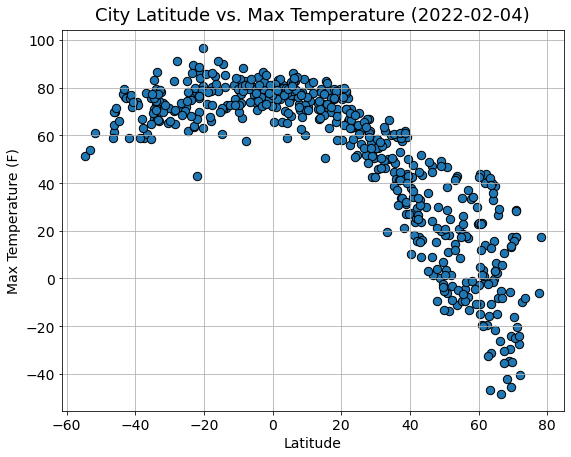

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.title("City Latitude vs. Max Temperature (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

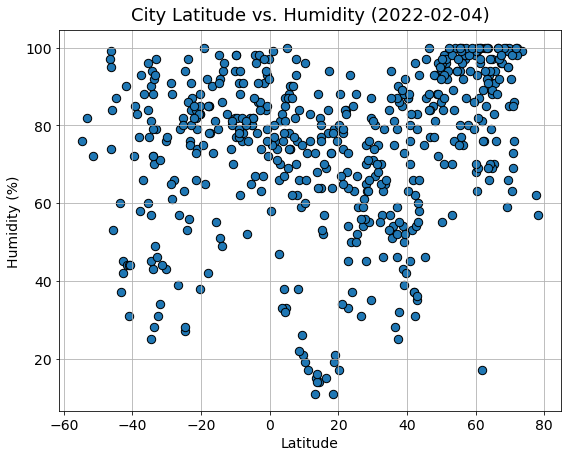

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.title("City Latitude vs. Humidity (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig('output_data/Fig2.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

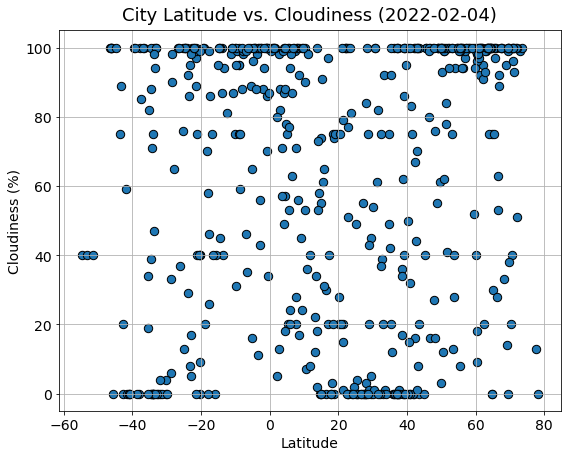

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.title("City Latitude vs. Cloudiness (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

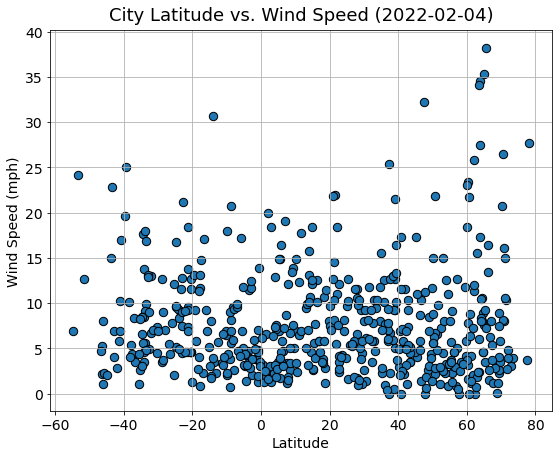

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.figure(figsize=[9, 7])
plt.scatter(x_axis, y_axis, edgecolors='black', s=70)

# Incorporate the other graph properties
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.title("City Latitude vs. Wind Speed (2022-02-04)", fontsize=18, pad=10)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, x_label, y_label, xy_string):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.figure(figsize=[9, 7])
    plt.scatter(x_values, y_values, s=70)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy_string, fontsize=20, color="red")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,lompoc,34.6391,-120.4579,60.01,84,75,8.01,US,1675563791
10,qaanaaq,77.4840,-69.3632,-6.29,62,13,3.74,GL,1675563794
11,yellowknife,62.4560,-114.3525,-19.68,76,20,0.00,CA,1675563794
13,tasiilaq,65.6145,-37.6368,26.76,94,100,38.23,GL,1675563796
15,ponta do sol,32.6667,-17.1000,61.72,57,39,7.74,PT,1675563797


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.48,76,8,12.71,PF,1675563787
1,hobart,-42.8794,147.3294,76.05,45,20,6.91,AU,1675563619
2,ushuaia,-54.8000,-68.3000,51.46,76,40,6.91,AR,1675563750
3,arraial do cabo,-22.9661,-42.0278,76.33,91,17,7.47,BR,1675563645
4,nerang,-27.9833,153.3333,91.38,66,65,7.00,AU,1675563789


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8760110438122503


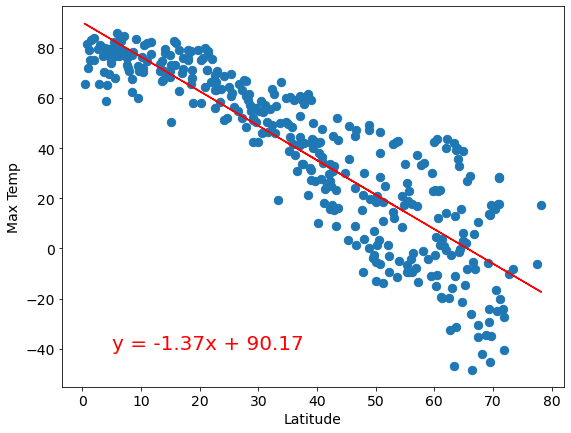

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regress(x_values, y_values, "Latitude", "Max Temp", (5, -40))

The r-value is: 0.44137892476646917


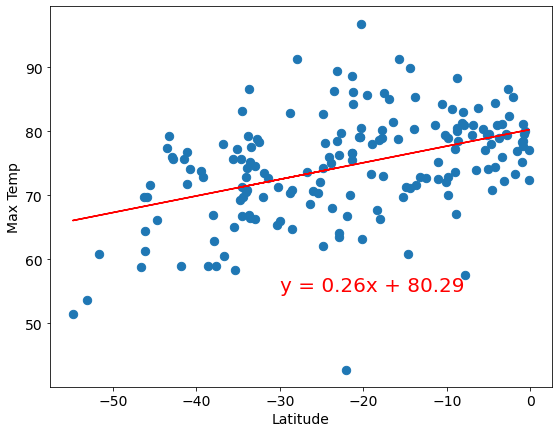

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regress(x_values, y_values, "Latitude", "Max Temp", (-30, 55))

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a high negative correlation coefficient that indicates that the further North one travels, the colder the max temperate is this time of the year. However, for the Southern Hemisphere, there is a low positive correlation coefficient that suggests there is no strong direct relationship between the distance traveled south and the max temperature during this time of the year.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.421380141099712


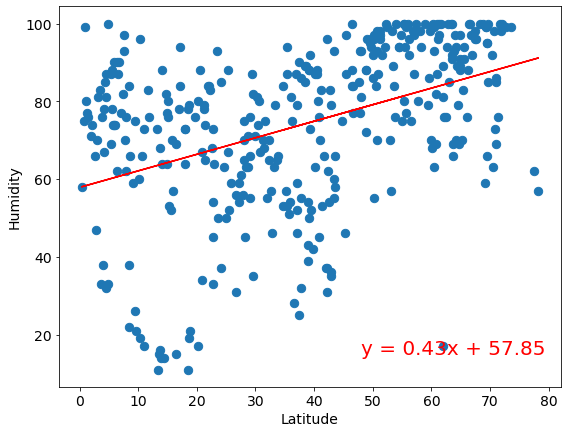

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regress(x_values, y_values, "Latitude", "Humidity", (48, 15))

The r-value is: 0.31029272199716523


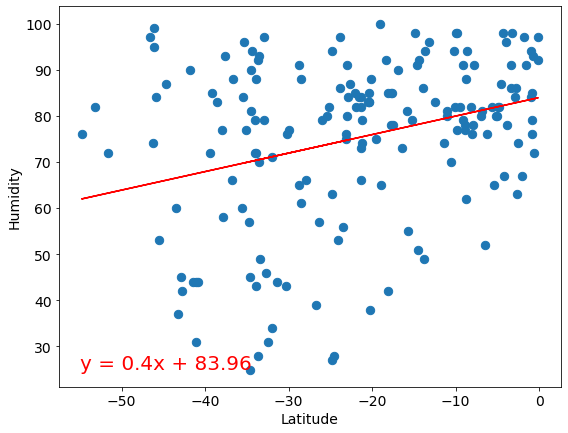

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regress(x_values, y_values, "Latitude", "Humidity", (-55, 25))

**Discussion about the linear relationship:** For the Northern and Southern Hemispheres, there is a mid to low positive correlation coefficient between the humidity and the latitude. Interesting enough both graphs are positive with the Southern Hemisphere having a y-intercept at 84% humidity and the Northern having a y-intercept at 58% humidity, with the y-intercept representing the equator. The increase in humidity from the equator to the distance traveled North in the Northern Hemisphere is greater than the increase in humidity from the distance traveled South to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23944752052955323


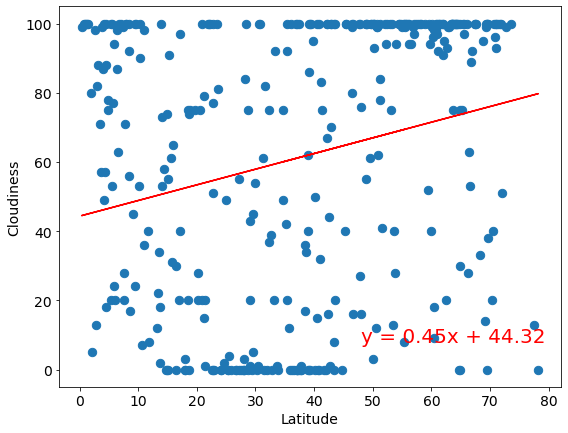

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regress(x_values, y_values, "Latitude", "Cloudiness", (48, 8))

The r-value is: 0.3406448650958012


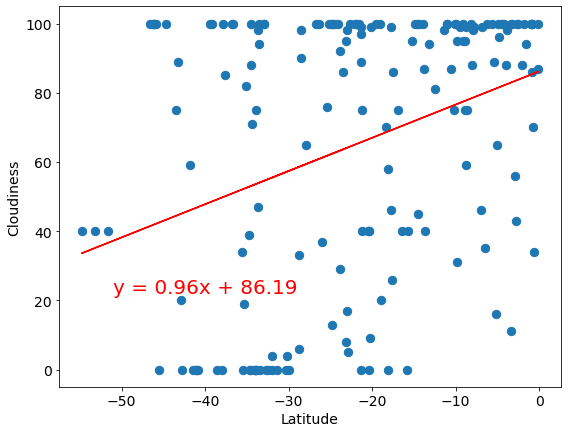

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regress(x_values, y_values, "Latitude", "Cloudiness", (-51, 22))

**Discussion about the linear relationship:** There is little to no relationship between the altitude and the cloudiness. The plotted points are sporadic and not uniform with the y-axis ranging from 0 to 100 with just an increase of 1, if any increase at all, on the x-axis.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0790480788357062


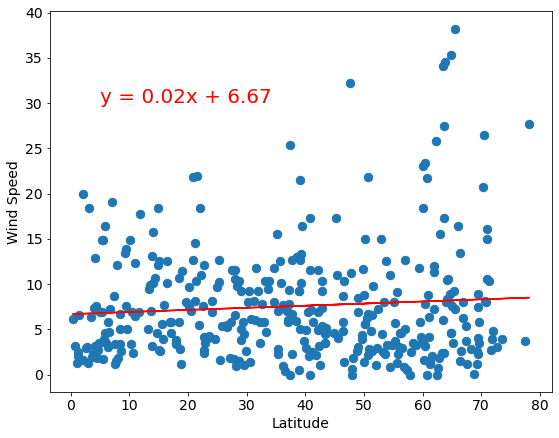

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regress(x_values, y_values, "Latitude", "Wind Speed", (5, 30))

The r-value is: -0.1893889354031395


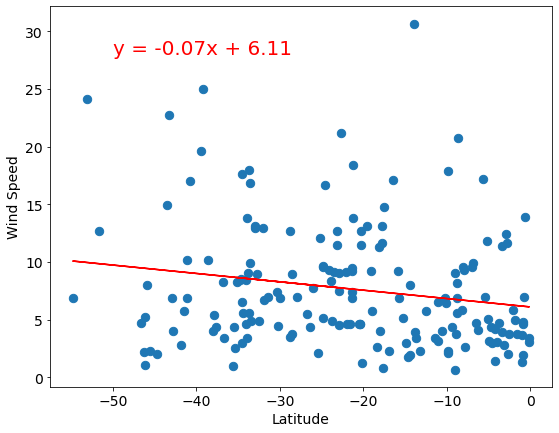

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regress(x_values, y_values, "Latitude", "Wind Speed", (-50, 28))

**Discussion about the linear relationship:** There is little to no relationship between the altitude and the wind speeds. The wind speeds do not have a wide range and are not uniform.